In [32]:
import numpy as np
import pandas as pd
import seaborn as sns 
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import scipy
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline
df=pd.read_csv("covid_19_data.csv")

In [33]:
df.head()


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [34]:
df.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
109377,109378,09/13/2020,Zaporizhia Oblast,Ukraine,2020-09-14 04:26:09,2347.0,33.0,1055.0
109378,109379,09/13/2020,Zeeland,Netherlands,2020-09-14 04:26:09,1135.0,72.0,0.0
109379,109380,09/13/2020,Zhejiang,Mainland China,2020-09-14 04:26:09,1280.0,1.0,1268.0
109380,109381,09/13/2020,Zhytomyr Oblast,Ukraine,2020-09-14 04:26:09,4292.0,82.0,2352.0
109381,109382,09/13/2020,Zuid-Holland,Netherlands,2020-09-14 04:26:09,23330.0,1354.0,0.0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109382 entries, 0 to 109381
Data columns (total 8 columns):
SNo                109382 non-null int64
ObservationDate    109382 non-null object
Province/State     75709 non-null object
Country/Region     109382 non-null object
Last Update        109382 non-null object
Confirmed          109382 non-null float64
Deaths             109382 non-null float64
Recovered          109382 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 6.7+ MB


SNo                    0
ObservationDate        0
Province/State     33673
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64


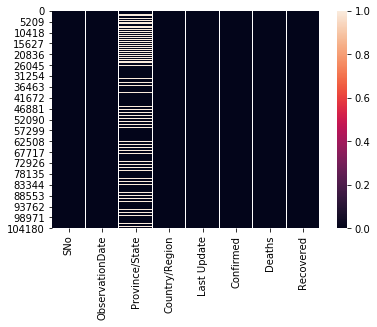

In [36]:
print(df.isnull().sum())
sns.heatmap(df.isnull())

                SNo  Confirmed    Deaths  Recovered
SNo        1.000000   0.195046  0.102946   0.132471
Confirmed  0.195046   1.000000  0.733350   0.415016
Deaths     0.102946   0.733350  1.000000   0.247780
Recovered  0.132471   0.415016  0.247780   1.000000


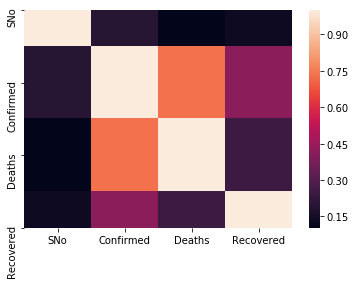

In [37]:
print(df.corr())
sns.heatmap(df.corr())

In [38]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,109382.000000,1.093820e+05,109382.000000,1.093820e+05
mean,54691.500000,1.758725e+04,743.484056,1.002470e+04
std,31576.007909,5.350244e+04,2796.896571,5.647842e+04
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,27346.250000,2.160000e+02,3.000000,3.000000e+00
50%,54691.500000,1.926000e+03,38.000000,3.560000e+02
75%,82036.750000,9.550750e+03,305.000000,3.395000e+03
max,109382.000000,1.037765e+06,42072.000000,2.451406e+06


In [39]:
df['Country/Region'].value_counts()

US                 11776
Russia              8837
Mainland China      7314
Japan               5417
Mexico              3827
                   ...  
Cape Verde             1
North Ireland          1
St. Martin             1
('St. Martin',)        1
East Timor             1
Name: Country/Region, Length: 223, dtype: int64

In [40]:
df.rename(columns={'ObservationDate':'Date', 'Province/State':'state', 'Country/Region':'Country', 'Last Update':'Recent'}, inplace=True)

In [41]:
df.head()

,SNo,Date,state,Country,Recent,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [42]:
df['state'].unique()

array(['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Taiwan',
       'Tianjin', 'Tibet', 'Washington', 'Xinjiang', 'Yunnan', 'Zhejiang',
       nan, 'Chicago', 'Illinois', 'California', 'Arizona', 'Ontario',
       'New South Wales', 'Victoria', 'British Columbia', 'Bavaria',
       'Queensland', 'Chicago, IL', 'South Australia', 'Boston, MA',
       'Los Angeles, CA', 'Orange, CA', 'Santa Clara, CA', 'Seattle, WA',
       'Tempe, AZ', 'San Benito, CA', 'Toronto, ON', 'London, ON',
       'Madison, WI', 'Cruise Ship', 'Diamond Princess cruise ship',
       'San Diego County, CA', 'San Antonio, TX', 'Ashland, NE',
       'Travis, CA', 'From Diamond Princess', 'Lackland, TX', 'None',
       'Humboldt

In [43]:
#########     ##########
dfstate = df.groupby(["state"])[['Confirmed', 'Deaths', 'Recovered']].sum()
dfstate.tail()

,Confirmed,Deaths,Recovered
state,,,
Zaporizhia Oblast,96643.0,2138.0,61837.0
Zeeland,56329.0,4129.0,0.0
Zhejiang,282036.0,207.0,259641.0
Zhytomyr Oblast,207945.0,4169.0,132868.0
Zuid-Holland,967874.0,78196.0,0.0


Confirmed


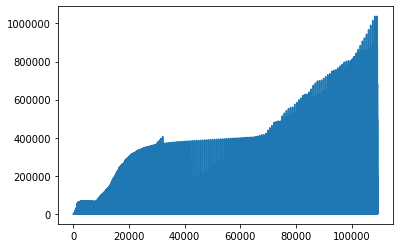

Deaths


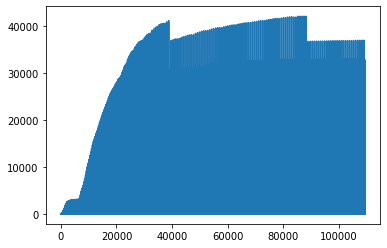

Recovered


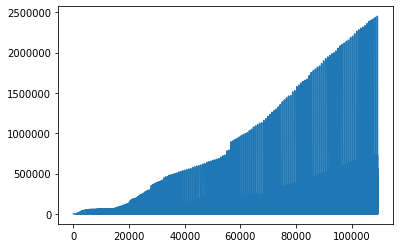

In [44]:
col=['Confirmed', 'Deaths', 'Recovered']
for i in col:
    print(i)
    plt.plot(df[i])
    plt.show()

In [45]:
#Sorting data w.r.t number of confirmed cases
max_confirmed_cases=dfstate.sort_values(by="Confirmed",ascending=False)
max_confirmed_cases[:3]

,Confirmed,Deaths,Recovered
state,,,
New York,60389214.0,4640076.0,0.0
Sao Paulo,51786832.0,2242700.0,33210917.0
California,48297662.0,1045460.0,40.0


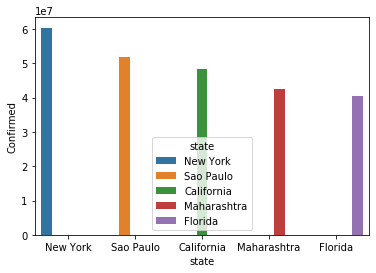

In [46]:
#Getting states with maximum number of confirmed cases
top_states_confirmed=max_confirmed_cases[0:5]
sns.barplot(x=top_states_confirmed.index,y="Confirmed",data=top_states_confirmed,hue=top_states_confirmed.index)
plt.show()

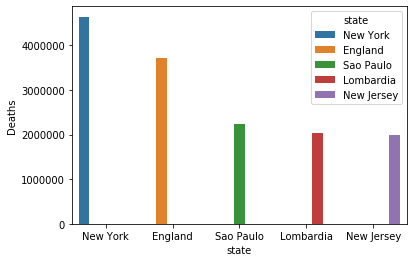

In [47]:
#Sorting data w.r.t number of death cases
max_death_cases=dfstate.sort_values(by="Deaths",ascending=False)

#Getting states with maximum number of death cases

top_states_death=max_death_cases[0:5]
sns.barplot(x=top_states_death.index,y="Deaths",data=top_states_death,hue=top_states_death.index)
plt.show()

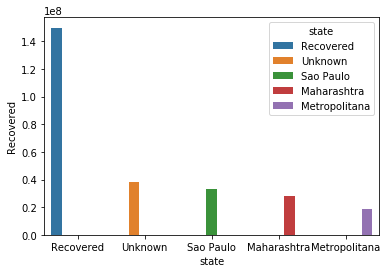

In [48]:
#Sorting data w.r.t number of cured cases
max_cured_cases=dfstate.sort_values(by="Recovered",ascending=False)

#Getting states with maximum number of cured cases
top_states_cured=max_cured_cases[0:5]
sns.barplot(x=top_states_cured.index,y="Recovered",data=top_states_cured,hue=top_states_cured.index)
plt.show()

In [49]:
dfDate = df.groupby(["Date"])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
dfDate.head()

,Date,Confirmed,Deaths,Recovered
0,01/22/2020,555.0,17.0,28.0
1,01/23/2020,653.0,18.0,30.0
2,01/24/2020,941.0,26.0,36.0
3,01/25/2020,1438.0,42.0,39.0
4,01/26/2020,2118.0,56.0,52.0


In [50]:
dfDate.isnull().any()

Date         False
Confirmed    False
Deaths       False
Recovered    False
dtype: bool

In [51]:
confirmed = dfDate[['Date', 'Confirmed']]
        #############    Dealing with missing values in our new datasets    ##############
for index, row in confirmed.iterrows():
    if row['Confirmed'] is None:
        row['Confirmed'] = 0.0

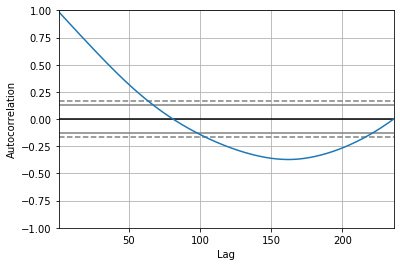

In [52]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(confirmed['Confirmed'])
plt.show()

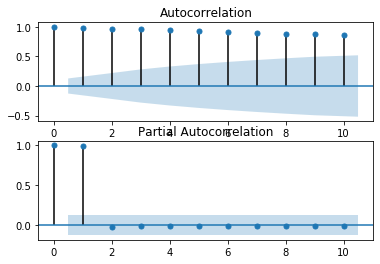

In [54]:
import statsmodels.api as sm
fig = plt.figure()

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(confirmed['Confirmed'], lags=10, ax=ax1) #
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(confirmed['Confirmed'], lags=10, ax=ax2)#
plt.show()

In [56]:
from statsmodels.tsa.arima_model import ARIMA  
MAConfirmed = ARIMA(np.array(confirmed['Confirmed']),  order=(2,1,0))
fitMAConfirmed = MAConfirmed.fit(disp=False)
predictMAConfirmed = fitMAConfirmed.predict(1, len(confirmed)+20)
predMAConfirmed = np.round(predictMAConfirmed)
print(predMAConfirmed)

[122988.   3350.   2963.   3164.   3348.   3483.   4999.   3630.   4491.
   4429.   4709.   6919.   6014.   6483.   6419.   5918.   6143.   5522.
   5626.   5337.   4803.   3392.  15077.  10522.   5538.   4851.   4729.
   4576.   3434.   3250.   3329.   4245.   3318.   3252.   3496.   3651.
   3979.   4049.   4474.   4941.   4678.   5093.   4985.   5334.   6349.
   6640.   6630.   6419.   7394.   9456.   5936.  16801.  14367.  13737.
  16044.  17737.  19715.  28226.  31242.  33894.  34536.  41538.  41763.
  49595.  61286.  64725.  68013.  62172.  63123.  74018.  76171.  80703.
  83186.  98826.  80226.  74375.  80589.  85178.  85227.  94940.  83504.
  76991.  72547.  62243.  77323.  94392.  89831.  80229.  83482.  74148.
  76886.  76236.  84087.  99485.  89474.  77673.  72103.  75047.  78035.
  66700.  83740.  84995.  81043.  77864.  80042.  91155.  91474.  92694.
  87827.  80062.  77159.  83863.  85798.  94082.  99849.  93818.  82534.
  87629.  94953.  98939. 105168. 108309. 101534.  9

C:\Users\prince\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


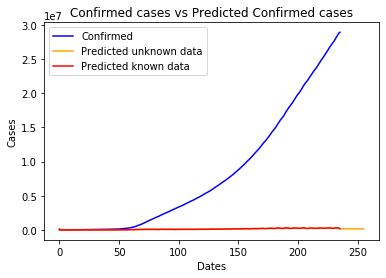

In [57]:
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(confirmed['Confirmed'], label='Confirmed', color='blue')
plt.plot(predictMAConfirmed, label='Predicted unknown data', color='orange')
plt.plot(predictMAConfirmed[:len(predictMAConfirmed)-20], label='Predicted known data', color='red')
plt.title('Confirmed cases vs Predicted Confirmed cases')
plt.legend()
plt.show()

In [58]:
death = dfDate[['Date', 'Deaths']]
death.head()

,Date,Deaths
0,01/22/2020,17.0
1,01/23/2020,18.0
2,01/24/2020,26.0
3,01/25/2020,42.0
4,01/26/2020,56.0


In [59]:
for index, row in death.iterrows():
    if row['Deaths'] is None:
        row['Deaths'] = 0.0

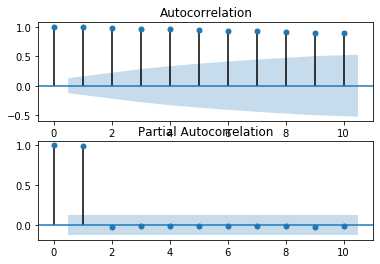

In [60]:
fig = plt.figure()

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(death['Deaths'], lags=10, ax=ax1) #
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(death['Deaths'], lags=10, ax=ax2)#
plt.show()

In [61]:
MADeath = ARIMA(np.array(death['Deaths']),  order=(1, 0, 0))
fitMADeath = MADeath.fit(disp=False)
predictMADeath = fitMADeath.predict(1, len(death) + 20)
predMADeath = np.round(predictMADeath)
print(predMADeath)

[1.70000e+01 1.80000e+01 2.60000e+01 4.20000e+01 5.60000e+01 8.20000e+01
 1.31000e+02 1.33000e+02 1.71000e+02 2.13000e+02 2.59000e+02 3.62000e+02
 4.26000e+02 4.92000e+02 5.64000e+02 6.34000e+02 7.19000e+02 8.06000e+02
 9.06000e+02 1.01300e+03 1.11300e+03 1.11800e+03 1.37100e+03 1.52300e+03
 1.66600e+03 1.77000e+03 1.86800e+03 2.00700e+03 2.12200e+03 2.24700e+03
 2.25100e+03 2.45800e+03 2.46900e+03 2.62900e+03 2.70800e+03 2.77000e+03
 2.81400e+03 2.87200e+03 2.94100e+03 2.99600e+03 3.08500e+03 3.16000e+03
 3.25400e+03 3.34800e+03 3.46000e+03 3.55800e+03 3.80300e+03 3.99600e+03
 4.26200e+03 4.61500e+03 4.72000e+03 5.40400e+03 5.81900e+03 6.44000e+03
 7.12600e+03 7.90500e+03 8.73300e+03 9.86700e+03 1.12990e+04 1.29730e+04
 1.46230e+04 1.64970e+04 1.86150e+04 2.11810e+04 2.39700e+04 2.71980e+04
 3.06520e+04 3.39250e+04 3.75820e+04 4.21070e+04 4.68090e+04 5.29830e+04
 5.87870e+04 6.46060e+04 6.93740e+04 7.45650e+04 8.18650e+04 8.83380e+04
 9.54550e+04 1.02525e+05 1.08502e+05 1.14089e+05 1.

C:\Users\prince\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


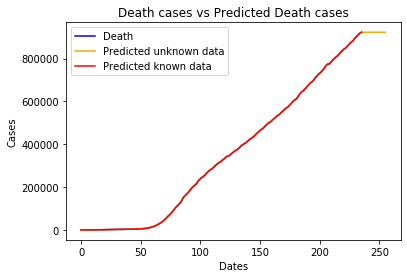

In [62]:
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(death['Deaths'], label='Death', color='blue')
plt.plot(predictMADeath, label='Predicted unknown data', color='orange')
plt.plot(predictMADeath[:len(predictMADeath)-20], label='Predicted known data', color='red')
plt.title('Death cases vs Predicted Death cases')
plt.legend()
plt.show()

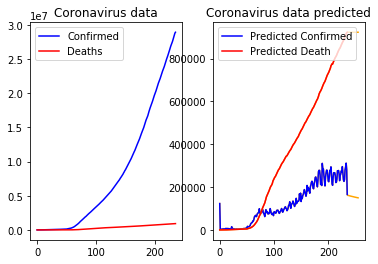

In [63]:
plt.subplot(121)
plt.title("Coronavirus data")
plt.plot(confirmed['Confirmed'], label='Confirmed', color='blue')
plt.plot(death['Deaths'], label='Deaths', color='red')
plt.legend()
plt.subplot(122)
plt.title("Coronavirus data predicted")
plt.plot(predMAConfirmed, color='orange')
plt.plot(predMAConfirmed[:len(predMAConfirmed)-20], label='Predicted Confirmed', color='blue')
plt.plot(predMADeath, color = 'orange')
plt.plot(predMADeath[:len(predMADeath)-20], label='Predicted Death', color = 'red')
plt.legend()
plt.show()

In [64]:
from statsmodels.tsa.ar_model import AR

In [65]:
ARConfirmed = AR(np.array(confirmed['Confirmed']))
fitARConfirmed = ARConfirmed.fit()
predictARConfirmed = fitARConfirmed.predict(15, len(confirmed) + 20)
predARConfirmed = np.round(predictARConfirmed)
print(predARConfirmed)

[3.3108000e+04 3.6953000e+04 4.0905000e+04 4.4446000e+04 4.6829000e+04
 4.9281000e+04 5.0557000e+04 5.0074000e+04 6.6364000e+04 7.5406000e+04
 7.4934000e+04 7.5893000e+04 7.9054000e+04 8.4351000e+04 8.7240000e+04
 8.3986000e+04 7.8194000e+04 8.0785000e+04 8.0663000e+04 8.0296000e+04
 8.0256000e+04 8.5328000e+04 8.6637000e+04 8.7605000e+04 8.9422000e+04
 9.1951000e+04 9.4600000e+04 9.7036000e+04 9.9739000e+04 1.0275500e+05
 1.0752600e+05 1.1177100e+05 1.1568300e+05 1.1947600e+05 1.2485800e+05
 1.3326700e+05 1.3631200e+05 1.5386100e+05 1.6790700e+05 1.7799200e+05
 1.9384300e+05 2.1158400e+05 2.3240500e+05 2.6570400e+05 2.9857300e+05
 3.2934800e+05 3.6608500e+05 4.1071600e+05 4.5752200e+05 5.1162300e+05
 5.8341500e+05 6.4965100e+05 7.2017700e+05 7.8287600e+05 8.4778300e+05
 9.3130200e+05 1.0182410e+06 1.0985010e+06 1.1786280e+06 1.2792880e+06
 1.3587560e+06 1.4298450e+06 1.5152060e+06 1.6070110e+06 1.6959650e+06
 1.7902930e+06 1.8576680e+06 1.9208940e+06 2.0009650e+06 2.0592210e+06
 2.141

C:\Users\prince\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


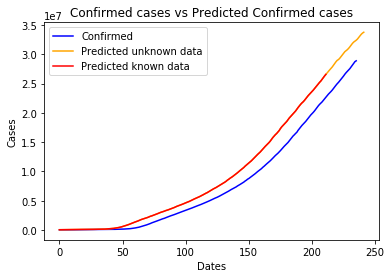

In [66]:
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(confirmed['Confirmed'], label='Confirmed', color='blue')
plt.plot(predARConfirmed, label='Predicted unknown data', color='orange')
plt.plot(predARConfirmed[:len(predARConfirmed)-30], label='Predicted known data', color='red')
plt.title('Confirmed cases vs Predicted Confirmed cases')
plt.legend()
plt.show()

In [67]:
ARDeath = AR(np.array(death['Deaths']))
fitARDeath = ARDeath.fit()
predictARDeath = fitARDeath.predict(15, len(death) + 20)
predARDeath = np.round(predictARDeath)
print(predARDeath)

[9.320000e+02 1.004000e+03 1.093000e+03 1.205000e+03 1.293000e+03
 1.397000e+03 1.499000e+03 1.473000e+03 1.793000e+03 1.971000e+03
 2.055000e+03 2.207000e+03 2.272000e+03 2.425000e+03 2.598000e+03
 2.683000e+03 2.632000e+03 2.889000e+03 2.852000e+03 2.979000e+03
 3.132000e+03 3.130000e+03 3.188000e+03 3.266000e+03 3.298000e+03
 3.364000e+03 3.472000e+03 3.500000e+03 3.606000e+03 3.716000e+03
 3.838000e+03 3.946000e+03 4.250000e+03 4.448000e+03 4.708000e+03
 5.143000e+03 5.184000e+03 6.022000e+03 6.538000e+03 7.067000e+03
 7.973000e+03 8.745000e+03 9.609000e+03 1.100700e+04 1.256000e+04
 1.434800e+04 1.618800e+04 1.814700e+04 2.051100e+04 2.340100e+04
 2.648900e+04 2.993100e+04 3.362700e+04 3.698300e+04 4.092600e+04
 4.599100e+04 5.096900e+04 5.772600e+04 6.383700e+04 6.945500e+04
 7.457800e+04 8.008600e+04 8.836900e+04 9.503100e+04 1.018420e+05
 1.090550e+05 1.142560e+05 1.200020e+05 1.261540e+05 1.326350e+05
 1.415600e+05 1.514550e+05 1.608090e+05 1.654640e+05 1.712300e+05
 1.774690e

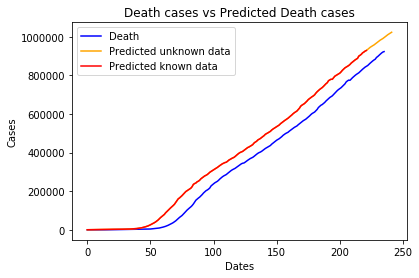

In [68]:
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(death['Deaths'], label='Death', color='blue')
plt.plot(predARDeath, label='Predicted unknown data', color='orange')
plt.plot(predARDeath[:len(predARDeath)-20], label='Predicted known data', color='red')
plt.title('Death cases vs Predicted Death cases')
plt.legend()
plt.show()